In [1]:
import os

import tensorflow as tf
import numpy as np

from model import CNeXt


2023-11-06 14:14:28.343814: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 14:14:28.366270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 14:14:28.366293: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 14:14:28.366307: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 14:14:28.371069: I tensorflow/core/platform/cpu_feature_g

In [2]:
with tf.device('/cpu:0'):
    image_classifier = CNeXt(num_classes=3)
    image_classifier.build((1, 256, 256, 3))
    if os.path.exists('image-model-weights.h5'):
        image_classifier.load_weights('image-model-weights.h5')
    else:
        raise FileNotFoundError('Model weights not found.')
    image_classifier.predict(np.zeros((1, 256, 256, 3)))

2023-11-06 14:14:30.571668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-06 14:14:30.587777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-06 14:14:30.587914: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 2s 2s/step


In [3]:
normal = 'dataset/normal.png'
ortho = 'dataset/ortho.jpg'
perio = 'dataset/perio.jpeg'
images = [normal, ortho, perio]

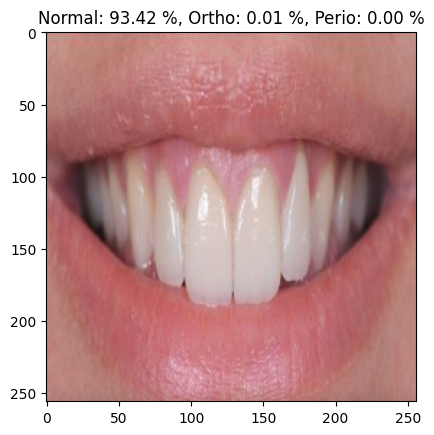

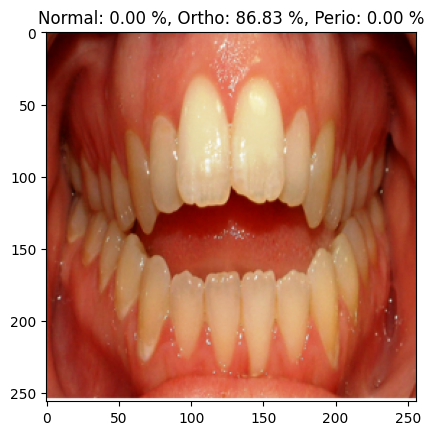

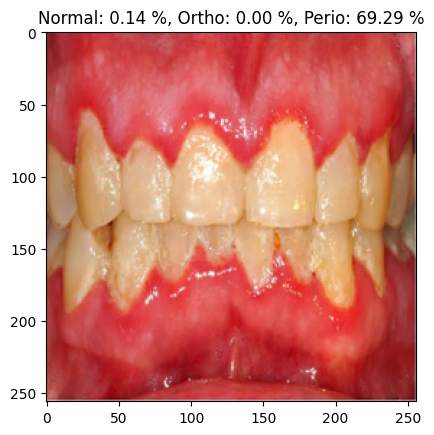

In [4]:
from matplotlib import pyplot as plt
from PIL import Image

for image in images:
    img = Image.open(image)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize((256, 256))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.expand_dims(img, axis=0)
    img = tf.cast(img, tf.float32)
    with tf.device('/cpu:0'):
        pred = image_classifier.predict(img, verbose=0)[0]
    plt.figure()
    plt.imshow(img[0] / 255)
    plt.title(f'Normal: {pred[0]*100:.2f} %, Ortho: {pred[1]*100:.2f} %, Perio: {pred[2]*100:.2f} %')
    plt.show()